# Synthetic Data Examples

In [1]:
# Uncomment the following line when running on Google Colab
# !pip install "autora"

Load the Weber-Fechner Law:

In [2]:
import numpy as np
from autora.experiment_runner.synthetic.psychophysics.weber_fechner_law import weber_fechner_law
s = weber_fechner_law()

Check the docstring to get information about the model

In [3]:
help(weber_fechner_law)

Help on function weber_fechner_law in module autora.experiment_runner.synthetic.psychophysics.weber_fechner_law:

weber_fechner_law(name='Weber-Fechner Law', resolution=100, constant=1.0, maximum_stimulus_intensity=5.0)
    Weber-Fechner Law
    
    Args:
        name: name of the experiment
        resolution: number of allowed values for stimulus 1 and 2
        constant: constant multiplier
        maximum_stimulus_intensity: maximum value for stimulus 1 and 2
    
    Examples:
        >>> experiment = weber_fechner_law()
    
        # The runner can accept numpy arrays or pandas DataFrames, but the return value will
        # always be a pandas DataFrame.
        >>> experiment.run(np.array([[.1,.2]]), random_state=42)
            S1   S2  difference_detected
        0  0.1  0.2             0.696194
    
        >>> experiment.run(pd.DataFrame({'S1': [0.1], 'S2': [0.2]}), random_state=42)
            S1   S2  difference_detected
        0  0.1  0.2             0.696194



... or use the describe function:

In [4]:
from autora.experiment_runner.synthetic.utilities import describe

print(describe(s))


    Weber-Fechner Law

    Args:
        name: name of the experiment
        resolution: number of allowed values for stimulus 1 and 2
        constant: constant multiplier
        maximum_stimulus_intensity: maximum value for stimulus 1 and 2

    Examples:
        >>> experiment = weber_fechner_law()

        # The runner can accept numpy arrays or pandas DataFrames, but the return value will
        # always be a pandas DataFrame.
        >>> experiment.run(np.array([[.1,.2]]), random_state=42)
            S1   S2  difference_detected
        0  0.1  0.2             0.696194

        >>> experiment.run(pd.DataFrame({'S1': [0.1], 'S2': [0.2]}), random_state=42)
            S1   S2  difference_detected
        0  0.1  0.2             0.696194

    


The synthetic experiement `s` has properties like the name of the experiment:

In [5]:
s.name

'Weber-Fechner Law'

... a valid metadata description:

In [6]:
s.variables

VariableCollection(independent_variables=[IV(name='S1', value_range=(0.01, 5.0), allowed_values=array([0.01      , 0.06040404, 0.11080808, 0.16121212, 0.21161616,
       0.2620202 , 0.31242424, 0.36282828, 0.41323232, 0.46363636,
       0.5140404 , 0.56444444, 0.61484848, 0.66525253, 0.71565657,
       0.76606061, 0.81646465, 0.86686869, 0.91727273, 0.96767677,
       1.01808081, 1.06848485, 1.11888889, 1.16929293, 1.21969697,
       1.27010101, 1.32050505, 1.37090909, 1.42131313, 1.47171717,
       1.52212121, 1.57252525, 1.62292929, 1.67333333, 1.72373737,
       1.77414141, 1.82454545, 1.87494949, 1.92535354, 1.97575758,
       2.02616162, 2.07656566, 2.1269697 , 2.17737374, 2.22777778,
       2.27818182, 2.32858586, 2.3789899 , 2.42939394, 2.47979798,
       2.53020202, 2.58060606, 2.6310101 , 2.68141414, 2.73181818,
       2.78222222, 2.83262626, 2.8830303 , 2.93343434, 2.98383838,
       3.03424242, 3.08464646, 3.13505051, 3.18545455, 3.23585859,
       3.28626263, 3.33666667, 3.

... a function to generate the full domain of the data (if possible)

In [7]:
x = s.domain()
x

array([[0.01      , 0.01      ],
       [0.01      , 0.06040404],
       [0.01      , 0.11080808],
       ...,
       [4.94959596, 4.94959596],
       [4.94959596, 5.        ],
       [5.        , 5.        ]])

... the experiment_runner which can be called to generate experimental results:

In [8]:
import numpy as np
y = s.run(x)  # doctest: +ELLIPSIS
y

,S1,S2,difference_detected
0,0.010000,0.010000,-0.019852
1,0.010000,0.060404,1.795605
2,0.010000,0.110808,2.419832
3,0.010000,0.161212,2.764744
4,0.010000,0.211616,3.041400
...,...,...,...
5045,4.899192,4.949596,0.007320
5046,4.899192,5.000000,0.020426
5047,4.949596,4.949596,0.005092
5048,4.949596,5.000000,0.006454


... a function to plot the ground truth:

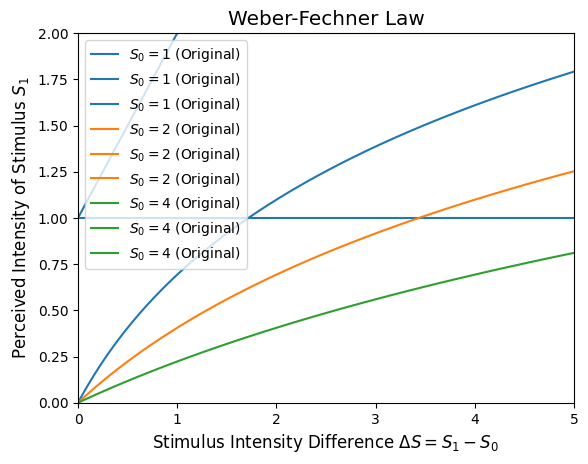

In [9]:
s.plotter()

... against a fitted model if it exists:

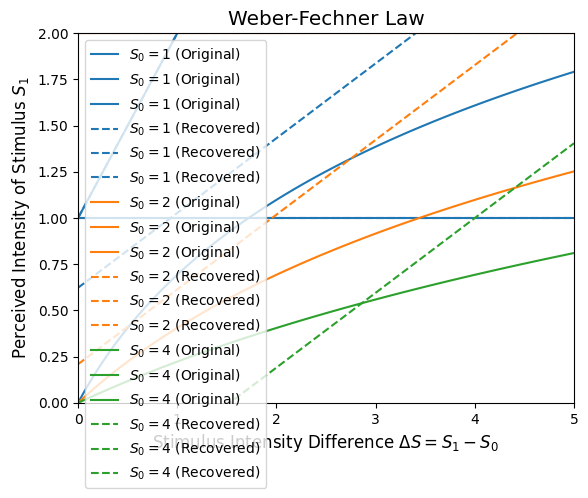

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x, y)
s.plotter(model)

We can wrap this functions to use with the state logic of AutoRA:
First, we create the state with the variables:

In [11]:
from autora.state import StandardState, on_state, experiment_runner_on_state, estimator_on_state
from autora.experimentalist.grid import grid_pool
from autora.experimentalist.random import random_sample
from functools import partial
import random

# We can get the variables from the runner
variables = s.variables

# With the variables, we initialize a StandardState
state = StandardState(variables)

Wrap the experimentalists in `on_state` function to use them on state:

In [12]:
# Wrap the functions to use on state
# Experimentalists:
pool_on_state = on_state(grid_pool, output=['conditions'])
sample_on_state = on_state(random_sample, output=['conditions'])

state = pool_on_state(state)
state = sample_on_state(state, num_samples=20)
print(state.conditions)

            S1        S2
5219  2.631010  0.967677
5872  2.933434  3.639091
8820  4.445556  1.018081
2923  1.471717  1.169293
1799  0.866869  5.000000
3007  1.522121  0.362828
6     0.010000  0.312424
6934  3.487879  1.723737
7668  3.840707  3.437475
399   0.161212  5.000000
9389  4.697576  4.495960
1993  0.967677  4.697576
2285  1.118889  4.294343
251   0.110808  2.580606
5831  2.933434  1.572525
5728  2.883030  1.421313
7023  3.538283  1.169293
9418  4.747980  0.917273
3907  1.975758  0.362828
4719  2.378990  0.967677


Wrap the runner with the `experiment_runner_on_state` wrapper to use it on state:

In [13]:
# Runner:
run_on_state = experiment_runner_on_state(s.run)
state = run_on_state(state)

state.experiment_data

,S1,S2,difference_detected
5219,2.631010,0.967677,-1.005242
5872,2.933434,3.639091,0.206191
8820,4.445556,1.018081,-1.481432
2923,1.471717,1.169293,-0.218904
1799,0.866869,5.000000,1.738668
3007,1.522121,0.362828,-1.422961
6,0.010000,0.312424,3.428299
6934,3.487879,1.723737,-0.716762
7668,3.840707,3.437475,-0.104266
399,0.161212,5.000000,3.437823


Wrap the regressor with the `estimator_on_state` wrapper:

In [14]:
theorist = LinearRegression()
theorist_on_state = estimator_on_state(theorist)

state = theorist_on_state(state)
# Access the last model:
model = state.models[-1]


print(f"I = "
      f"{model.coef_[0][0]:.2f}*S0 "
      f"{model.coef_[0][1]:+.2f}*S1 "
      f"{model.intercept_[0]:+.2f} ")

I = -0.75*S0 +0.42*S1 +0.97 
